## Fields

In [41]:
# import packages
import sys
import os
from dotenv import load_dotenv
from IPython.display import display, HTML
import json
import matplotlib.pyplot as plt
import folium
import pandas as pd
import geopandas as gpd

# Load environment variables from .env file
load_dotenv()

# import the API builder
sys.path.append(os.path.abspath("../../"))
from scoutmaster.api import ScoutMasterAPI

In [42]:
# Scoutmaster API - Credentials
client_id = os.getenv('SM_CLIENT_ID')
client_secret = os.getenv('SM_CLIENT_SECRET')
project_id = os.getenv('SM_PROJECT_ID')
dev = os.getenv("DEV")

# Scoutmaster API - Init
SM_API = ScoutMasterAPI(dev)
SM_API.authenticate(client_id=client_id, client_secret=client_secret)

✅ Successfully authenticated ScoutMaster API
HOST: https://dev-api.scoutmaster.nl/v2/


In [43]:
output_folder = "../../data/output/"

In [44]:
df_projects = SM_API.projects()
df_projects

,id,name,abbreviation,logo_path
0,8574cc2c-857e-477d-8a7d-e14e047adb5e,,,None
1,6d3359ee-2988-4b23-b35b-14391e0eaa5f,04/06/2025 project,PR,None
2,c52cc8b0-fd2e-4d7b-bc73-9623f8f212ae,Abaco project,AB,None
3,db21b65c-88b0-401f-b7e2-700737e1717a,ChicoGrow project,CH,None
4,282201d8-406a-46f3-91cf-9c5b4031556f,New Project,NP,None
5,227ca66e-3108-4bd2-9b7e-8732c68e90ad,retew,RE,None
6,7916f2f2-aa82-4daf-9db4-16b86386bbfd,sadsa,SA,None
7,13a991ec-2a2c-4cae-878d-df32ce11c54c,sadsasdasda,SA,None
8,48ba0c44-7c95-4fe2-8971-dd04ecfeda73,sadsdsadasda,SA,None
9,ff9548db-3e82-4f59-9995-fdfb010ebb57,SQAT,Sq,None


In [45]:
project = df_projects.iloc[13]
project_id = project["id"]
print(project)


id                           5f88d0d3-e4fc-482d-8981-b3532fa7e2c7
name                                                 Test Project
abbreviation                                                   TE
logo_path       https://bioscope-products.s3.eu-central-1.amaz...
Name: 13, dtype: object


In [46]:
SM_API.output_format = 'df'
df_fields = SM_API.fields(project_id=project_id)
df_fields 

,id,name,address,area_ha,geometry,created_at,deleted_at,properties,updated_at,country_code,reference_point,scoutMaster_reportId
0,39507fbd-6f0e-49e5-bdb2-f36d964cffa1,bieten rombouts 25,"{'road': 'Brede Balrouw', 'state': 'Noord-Brab...",3.13,"POLYGON((4.57549667 51.58900725,4.57435942 51....",2025-07-30T13:42:43.496+00:00,None,{'description': 'A description of the field'},2025-07-30T13:42:43.496+00:00,None,None,None
1,b9355535-57c8-4dc4-98cc-13b211486ae8,jan wolfsven achter koraan,"{'road': 'E34', 'town': 'Mol', 'state': 'Antwe...",6.89,"POLYGON((5.153874601445684 51.30599682346048,5...",2025-01-31T17:10:09.802391+00:00,None,None,2025-01-31T17:10:09.802412+00:00,None,None,None
2,fb34d37d-baa1-4e8a-a8cd-5a5f60c5e7c3,KNVB zeist - veld 2,"{'road': 'Woudenbergseweg', 'town': 'Zeist', '...",0.79,"POLYGON((5.2931019551254 52.089336855448,5.291...",2025-08-14T12:33:40.256+00:00,None,{'description': 'A description of the field'},2025-08-14T12:33:40.256+00:00,None,None,None
3,e184e655-494c-4b78-9f61-13a5abee6b98,Parcel 1,"{'road': 'Averlose Houtweg', 'state': 'Overijs...",47187.50,"POLYGON((5.965393572319225 52.38960832650034,5...",2026-01-19T18:29:56.931494+00:00,None,{'description': ''},2026-01-19T18:29:56.931494+00:00,None,None,None
4,8e6b77a5-e025-4cb5-947a-efdda17c562e,Parcel 1,"{'city': 'Buurmalsen', 'road': 'Nieuwe Steeg',...",0.97,"POLYGON((5.298669390899618 51.909290918712685,...",2026-01-19T18:34:16.663927+00:00,None,{'description': ''},2026-01-19T18:34:16.663927+00:00,None,None,None
5,16b6f480-cf7e-4e82-850e-a34ca30f0498,Parcel 1,"{'road': 'Lange Dreef', 'town': 'Culemborg', '...",1.81,"POLYGON((5.243629543629972 51.96311634184721,5...",2026-01-19T21:34:02.38306+00:00,None,{'description': ''},2026-01-19T21:34:02.38306+00:00,None,None,None
6,7e9e8bf1-c782-4d0e-9003-0a392c0ecc55,Parcel 1,"{'road': 'Amerongerwetering', 'state': 'Utrech...",130713.79,"POLYGON((5.082912468793471 52.137460418811685,...",2026-01-19T17:38:50.18399+00:00,None,{'description': ''},2026-01-19T17:38:50.18399+00:00,None,None,None
7,51a1f1e4-1491-48fa-8468-619ffabac34f,Parcel 1,"{'state': 'Noord-Holland', 'hamlet': 'Rozewerf...",49355.15,"POLYGON((4.742155811400783 52.439865938647074,...",2026-01-19T18:29:33.398779+00:00,None,{'description': ''},2026-01-19T18:29:33.398779+00:00,None,None,None
8,10f08d0c-f1be-4ff3-8aed-556b15dfb61a,Perceel,"{'road': 'Woerdenseweg', 'state': 'Utrecht', '...",3.16,"POLYGON((5.014589162438086 52.156113823704914,...",2026-01-19T19:40:29.25314+00:00,None,{'description': ''},2026-01-19T19:40:29.25314+00:00,None,None,None
9,5150a1c3-1a97-4cf7-91d6-73abfba66f06,test,"{'city': 'Almere', 'road': 'Muidergouw', 'stat...",0.76,"POLYGON((5.2155 52.3495,5.2165 52.3495,5.2165 ...",2025-11-27T10:17:04.534897+00:00,None,None,2025-11-27T10:17:04.534897+00:00,None,None,None


In [47]:
SM_API.output_format = 'geojson'
geojson_fields = SM_API.fields(project_id)

output_file =  output_folder + 'fields.geojson'
with open(output_file, "w") as f:
    if isinstance(geojson_fields, str):
        f.write(geojson_fields)
    else:
        # If it's a Python dict, convert to JSON first
        json.dump(geojson_fields, f, indent=2)

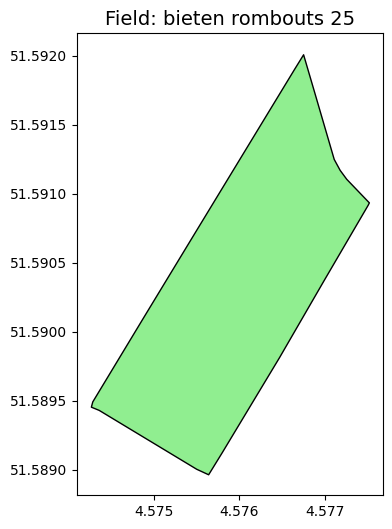

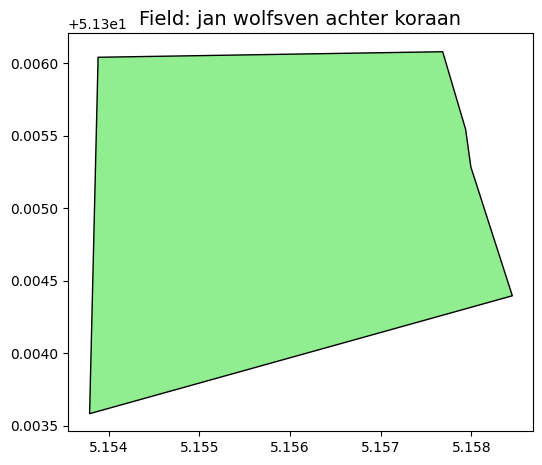

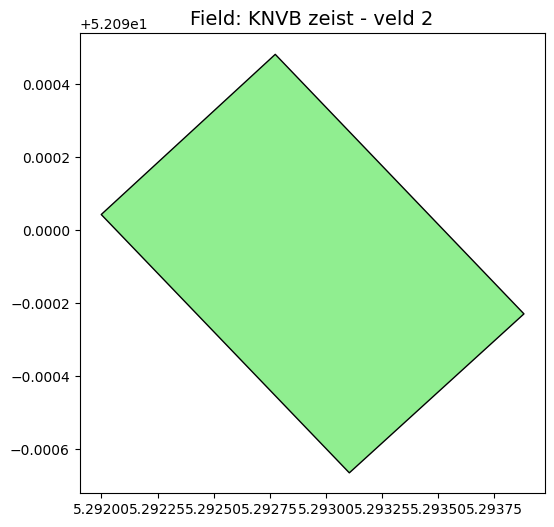

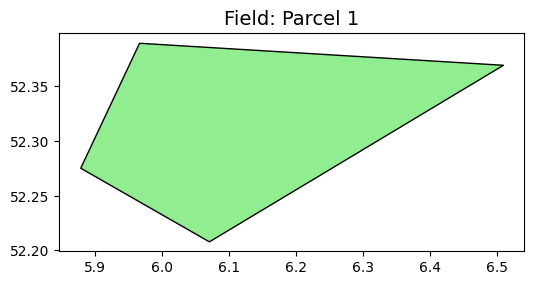

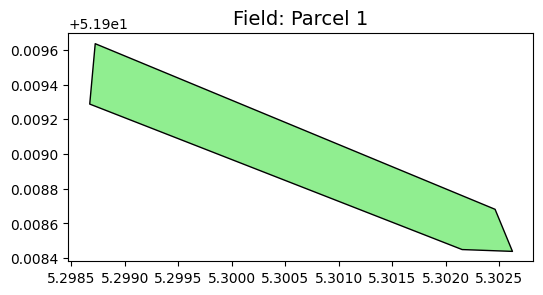

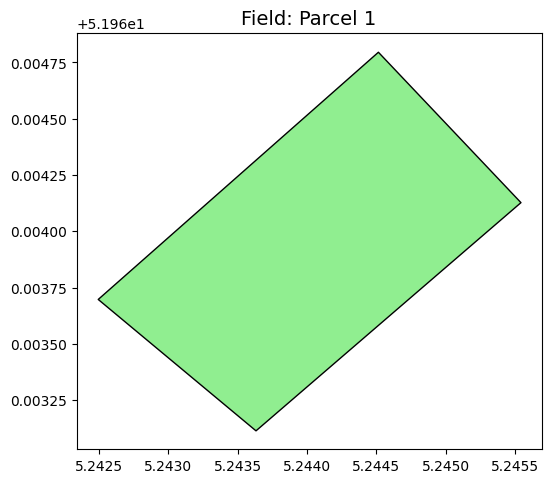

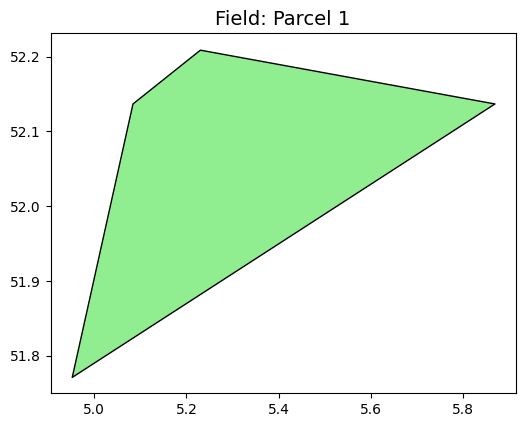

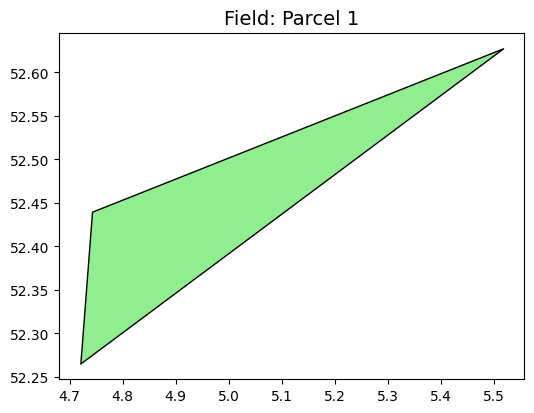

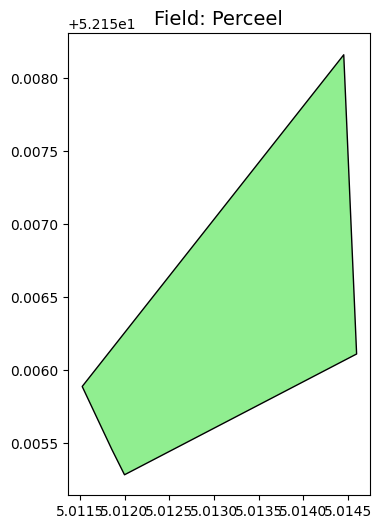

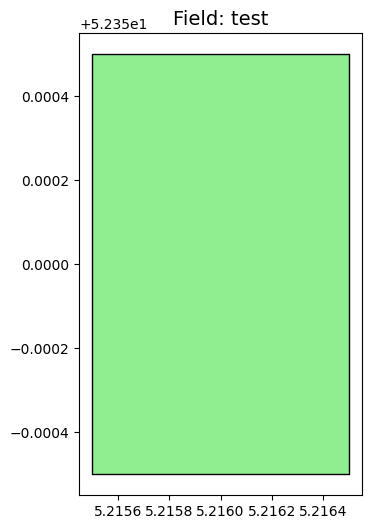

In [48]:
SM_API.output_format = 'gdf'
gdf_fields = SM_API.fields(project_id=project_id)
gdf_fields_subset = gdf_fields.iloc[0:10]
for index, row in gdf_fields_subset.iterrows():
    # Select single row as GeoDataFrame
    gdf_field = gdf_fields_subset.loc[[index]]  # double brackets to keep it as GeoDataFrame

    # Get field name from row (replace 'field_name' with the actual column name)
    field_name = row['name']  
    # Plot
    ax = gdf_field.plot(figsize=(6, 6), edgecolor='black', facecolor='lightgreen')
    ax.set_title(f"Field: {field_name}", fontsize=14)
    plt.show()

In [49]:
gdf_fields

,geometry,id,name,address,area_ha,created_at,deleted_at,properties,updated_at,country_code,reference_point,scoutMaster_reportId
0,"POLYGON ((4.5755 51.58901, 4.57436 51.58943, 4...",39507fbd-6f0e-49e5-bdb2-f36d964cffa1,bieten rombouts 25,"{'road': 'Brede Balrouw', 'state': 'Noord-Brab...",3.13,2025-07-30T13:42:43.496+00:00,None,{'description': 'A description of the field'},2025-07-30T13:42:43.496+00:00,None,None,None
1,"POLYGON ((5.15387 51.306, 5.15388 51.30604, 5....",b9355535-57c8-4dc4-98cc-13b211486ae8,jan wolfsven achter koraan,"{'road': 'E34', 'town': 'Mol', 'state': 'Antwe...",6.89,2025-01-31T17:10:09.802391+00:00,None,None,2025-01-31T17:10:09.802412+00:00,None,None,None
2,"POLYGON ((5.2931 52.08934, 5.292 52.09004, 5.2...",fb34d37d-baa1-4e8a-a8cd-5a5f60c5e7c3,KNVB zeist - veld 2,"{'road': 'Woudenbergseweg', 'town': 'Zeist', '...",0.79,2025-08-14T12:33:40.256+00:00,None,{'description': 'A description of the field'},2025-08-14T12:33:40.256+00:00,None,None,None
3,"POLYGON ((5.96539 52.38961, 5.87754 52.27548, ...",e184e655-494c-4b78-9f61-13a5abee6b98,Parcel 1,"{'road': 'Averlose Houtweg', 'state': 'Overijs...",47187.50,2026-01-19T18:29:56.931494+00:00,None,{'description': ''},2026-01-19T18:29:56.931494+00:00,None,None,None
4,"POLYGON ((5.29867 51.90929, 5.29872 51.90964, ...",8e6b77a5-e025-4cb5-947a-efdda17c562e,Parcel 1,"{'city': 'Buurmalsen', 'road': 'Nieuwe Steeg',...",0.97,2026-01-19T18:34:16.663927+00:00,None,{'description': ''},2026-01-19T18:34:16.663927+00:00,None,None,None
5,"POLYGON ((5.24363 51.96312, 5.24482 51.96375, ...",16b6f480-cf7e-4e82-850e-a34ca30f0498,Parcel 1,"{'road': 'Lange Dreef', 'town': 'Culemborg', '...",1.81,2026-01-19T21:34:02.38306+00:00,None,{'description': ''},2026-01-19T21:34:02.38306+00:00,None,None,None
6,"POLYGON ((5.08291 52.13746, 4.95101 51.77184, ...",7e9e8bf1-c782-4d0e-9003-0a392c0ecc55,Parcel 1,"{'road': 'Amerongerwetering', 'state': 'Utrech...",130713.79,2026-01-19T17:38:50.18399+00:00,None,{'description': ''},2026-01-19T17:38:50.18399+00:00,None,None,None
7,"POLYGON ((4.74216 52.43987, 4.72017 52.26539, ...",51a1f1e4-1491-48fa-8468-619ffabac34f,Parcel 1,"{'state': 'Noord-Holland', 'hamlet': 'Rozewerf...",49355.15,2026-01-19T18:29:33.398779+00:00,None,{'description': ''},2026-01-19T18:29:33.398779+00:00,None,None,None
8,"POLYGON ((5.01459 52.15611, 5.01445 52.15817, ...",10f08d0c-f1be-4ff3-8aed-556b15dfb61a,Perceel,"{'road': 'Woerdenseweg', 'state': 'Utrecht', '...",3.16,2026-01-19T19:40:29.25314+00:00,None,{'description': ''},2026-01-19T19:40:29.25314+00:00,None,None,None
9,"POLYGON ((5.2155 52.3495, 5.2165 52.3495, 5.21...",5150a1c3-1a97-4cf7-91d6-73abfba66f06,test,"{'city': 'Almere', 'road': 'Muidergouw', 'stat...",0.76,2025-11-27T10:17:04.534897+00:00,None,None,2025-11-27T10:17:04.534897+00:00,None,None,None


In [50]:
# Convert 'created_at' to datetime
gdf_fields = gdf_fields.copy()
gdf_fields["created_at"] = pd.to_datetime(
    "2025-06-16T16:54:23.294+00:00", utc=True
)

# Reproject to metric CRS for calculations
gdf_proj = gdf_fields.to_crs(epsg=3857)

# Compute centroid in projected CRS
centroid_proj = gdf_proj.geometry.centroid.unary_union.centroid

# Transform centroid back to WGS84 for folium
centroid = gpd.GeoSeries([centroid_proj], crs=gdf_proj.crs).to_crs(epsg=4326).iloc[0]

# Transform geometries back to WGS84 for display
gdf_wgs = gdf_proj.to_crs(epsg=4326)

# Compute map bounds
total_bounds = gdf_wgs.total_bounds
sw = [total_bounds[1], total_bounds[0]]
ne = [total_bounds[3], total_bounds[2]]

# Create folium map with Esri imagery
m = folium.Map(
    location=[centroid.y, centroid.x],
    tiles="Esri.WorldImagery",
    attr="Esri"
)

m.fit_bounds([sw, ne])

# Add polygons
for idx, row in gdf_wgs.iterrows():
    popup_text = "<b>Field Details</b><br>"
    for col in gdf_wgs.columns:
        if col != "geometry":
            popup_text += f"<b>{col}:</b> {row[col]}<br>"
        
    folium.GeoJson(
        row.geometry,
        name=str(idx),
        popup=folium.Popup(popup_text, max_width=400)
    ).add_to(m)

display(m)


C:\Users\Rinus\AppData\Local\Temp\ipykernel_8080\1696706695.py:11: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid_proj = gdf_proj.geometry.centroid.unary_union.centroid
